In [1]:
import graph_tool.all as gt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# import igraph as ig

In [2]:
g = gt.collection.ns['law_firm']
g_view = gt.GraphView(g, vfilt=gt.label_largest_component(g))

In [3]:
print(g.gp.description)

Multiplex network with 3 edge types representing relationships (coworkers, friendship, advice) between partners and associates of a corporate law firm.  Data hosted by Manlio De Domenico.[^icon]
[^icon]: Description obtained from the [ICON](https://icon.colorado.edu) project.


# Centrality.closeness

In [4]:
c = gt.closeness(g_view)
gt.graph_draw(g_view, pos=g_view.vp._pos, vertex_fill_color=c,
              vertex_size=gt.prop_to_size(c, mi=5, ma=15),
              vcmap=matplotlib.cm.gist_heat,
              vorder=c, output="lawyer_firm_closeness.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe9f8cf4b50, at 0x7fe9f8c177c0>

# Centrality.betweenness

In [5]:
vp, ep = gt.betweenness(g_view)
gt.graph_draw(g_view, pos=g_view.vp._pos, vertex_fill_color=vp,
              vertex_size=gt.prop_to_size(vp, mi=5, ma=15),
              edge_pen_width=gt.prop_to_size(ep, mi=0.5, ma=5),
              vcmap=matplotlib.cm.gist_heat, vorder=vp, output="lawyer_firm_betweenness.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe9f8cf4b50, at 0x7fea207a4340>

# Graph analysis

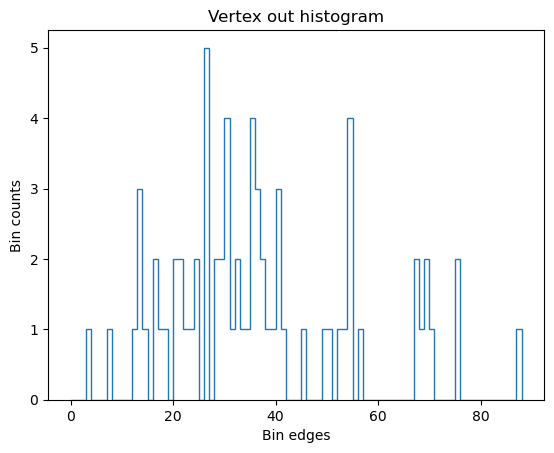

In [6]:
bin_counts, bin_edges = gt.vertex_hist(g, "out")
plt.xlabel("Bin edges")
plt.ylabel("Bin counts")
plt.title("Vertex out histogram")
plt.stairs(bin_counts, bin_edges)

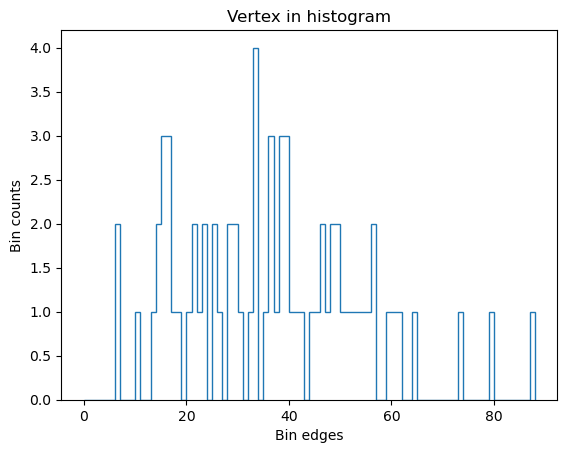

In [7]:
bin_counts, bin_edges = gt.vertex_hist(g, "in")
plt.xlabel("Bin edges")
plt.ylabel("Bin counts")
plt.title("Vertex in histogram")
plt.stairs(bin_counts, bin_edges)

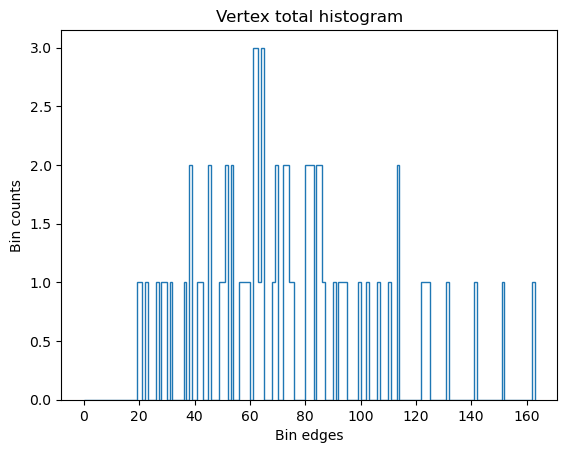

In [8]:
bin_counts, bin_edges = gt.vertex_hist(g, "total")
plt.xlabel("Bin edges")
plt.ylabel("Bin counts")
plt.title("Vertex total histogram")
plt.stairs(bin_counts, bin_edges)

In [9]:
# average and std
print(f"Degree average in: {gt.vertex_average(g, 'in')}")
print(f"Degree average out: {gt.vertex_average(g, 'out')}")

Degree average in: (36.2112676056338, 2.0443326466666907)
Degree average out: (36.2112676056338, 2.150636937154291)


# Iterator vertices

In [10]:
for v, name, status, gender, office, seniority, age, practice, lawSchool in g.iter_vertices([g.vp.name, g.vp.nodeStatus, g.vp.nodeGender, g.vp.nodeOffice, g.vp.nodeSeniority, g.vp.nodeAge, g.vp.nodePractice, g.vp.nodeLawSchool]):
    print(v, name, status, gender, office, seniority, age, practice, lawSchool)

0 1 1 1 1 31 64 1 1
1 1 1 1 1 32 62 2 1
2 1 1 1 2 13 67 1 1
3 1 1 1 1 31 59 2 3
4 1 1 1 2 31 59 1 2
5 1 1 1 2 29 55 1 1
6 1 1 1 2 29 63 2 3
7 1 1 1 1 28 53 1 3
8 1 1 1 1 25 53 2 1
9 1 1 1 1 25 53 2 3
10 1 1 1 1 23 50 1 1
11 1 1 1 1 24 52 2 2
12 1 1 1 1 22 57 1 2
13 1 1 1 2 1 56 2 1
14 1 1 1 3 21 48 2 3
15 1 1 1 1 20 46 2 1
16 1 1 1 1 23 50 2 1
17 1 1 1 2 18 45 1 2
18 1 1 1 1 19 46 2 1
19 1 1 1 1 19 49 1 1
20 1 1 1 1 17 43 1 2
21 1 1 1 1 9 49 1 3
22 1 1 1 1 16 45 1 2
23 1 1 1 1 15 44 1 2
24 1 1 1 2 15 43 2 2
25 1 1 1 1 15 41 1 3
26 1 1 2 1 13 47 1 1
27 1 1 1 2 11 38 2 2
28 1 1 2 1 10 38 2 3
29 1 1 1 2 7 39 1 3
30 1 1 1 2 8 34 1 2
31 1 1 1 2 8 33 1 3
32 1 1 1 2 8 37 1 3
33 1 1 2 1 8 36 2 2
34 1 1 1 2 8 33 2 3
35 1 1 1 1 5 43 1 3
36 2 2 1 3 5 44 2 3
37 2 2 2 1 7 53 1 2
38 2 2 2 1 6 37 1 1
39 2 2 1 1 6 34 1 1
40 2 2 1 1 5 31 1 2
41 2 2 1 1 4 31 2 2
42 2 2 2 1 5 47 1 2
43 2 2 2 3 5 53 2 1
44 2 2 1 1 3 38 2 3
45 2 2 2 2 3 42 2 2
46 2 2 1 3 3 38 1 3
47 2 2 2 1 1 35 2 3
48 2 2 1 1 4 36 1 2
49 

In [11]:
for source, target, idx, layer in g.iter_edges([g.edge_index, g.ep.layer]):
    print(source, target, idx, g.gp.layer_key[layer])
    if source == 2:
        break

0 1 0 advice
0 16 1 advice
0 19 2 advice
0 1 3 friendship
0 3 4 friendship
0 7 5 friendship
0 16 6 friendship
0 16 7 co-work
0 38 8 co-work
0 39 9 co-work
0 40 10 co-work
0 55 11 co-work
0 56 12 co-work
1 0 13 advice
1 5 14 advice
1 16 15 advice
1 19 16 advice
1 21 17 advice
1 23 18 advice
1 25 19 advice
1 15 20 friendship
1 16 21 friendship
1 21 22 friendship
1 25 23 friendship
1 6 24 co-work
1 9 25 co-work
1 15 26 co-work
1 16 27 co-work
1 21 28 co-work
1 25 29 co-work
1 28 30 co-work
1 33 31 co-work
1 43 32 co-work
1 44 33 co-work
1 52 34 co-work
1 61 35 co-work
1 63 36 co-work
2 1 37 advice


In [12]:
for u, name, status, gender, office, seniority, age, practice, lawSchool in g.iter_all_neighbors(1, [g.vp.name, g.vp.nodeStatus, g.vp.nodeGender, g.vp.nodeOffice, g.vp.nodeSeniority, g.vp.nodeAge, g.vp.nodePractice, g.vp.nodeLawSchool]):
    print(u, name, status, gender, office, seniority, age, practice, lawSchool)

0 1 1 1 1 31 64 1 1
5 1 1 1 2 29 55 1 1
16 1 1 1 1 23 50 2 1
19 1 1 1 1 19 49 1 1
21 1 1 1 1 9 49 1 3
23 1 1 1 1 15 44 1 2
25 1 1 1 1 15 41 1 3
15 1 1 1 1 20 46 2 1
16 1 1 1 1 23 50 2 1
21 1 1 1 1 9 49 1 3
25 1 1 1 1 15 41 1 3
6 1 1 1 2 29 63 2 3
9 1 1 1 1 25 53 2 3
15 1 1 1 1 20 46 2 1
16 1 1 1 1 23 50 2 1
21 1 1 1 1 9 49 1 3
25 1 1 1 1 15 41 1 3
28 1 1 2 1 10 38 2 3
33 1 1 2 1 8 36 2 2
43 2 2 2 3 5 53 2 1
44 2 2 1 1 3 38 2 3
52 2 2 1 1 10 38 2 3
61 2 2 1 1 2 32 2 2
63 2 2 2 1 2 45 2 2
0 1 1 1 1 31 64 1 1
0 1 1 1 1 31 64 1 1
2 1 1 1 2 13 67 1 1
3 1 1 1 1 31 59 2 3
3 1 1 1 1 31 59 2 3
6 1 1 1 2 29 63 2 3
6 1 1 1 2 29 63 2 3
9 1 1 1 1 25 53 2 3
9 1 1 1 1 25 53 2 3
11 1 1 1 1 24 52 2 2
11 1 1 1 1 24 52 2 2
14 1 1 1 3 21 48 2 3
14 1 1 1 3 21 48 2 3
15 1 1 1 1 20 46 2 1
15 1 1 1 1 20 46 2 1
15 1 1 1 1 20 46 2 1
16 1 1 1 1 23 50 2 1
16 1 1 1 1 23 50 2 1
16 1 1 1 1 23 50 2 1
18 1 1 1 1 19 46 2 1
18 1 1 1 1 19 46 2 1
19 1 1 1 1 19 49 1 1
21 1 1 1 1 9 49 1 3
21 1 1 1 1 9 49 1 3
21 1 1 1 1 9 49

In [13]:
g.list_properties()

name              (graph)   (type: string, val: law_firm)
description       (graph)   (type: string, val: Multiplex network with 3 edge
                                                types representing
                                                relationships (coworkers,
                                                friendship, advice) between
                                                partners and associates of a
                                                corporate law firm.  Data
                                                hosted by Manlio De
                                                Domenico.[^icon] [^icon]:
                                                Description obtained from the [
                                                ICON](https://icon.colorado.edu
                                                ) project.)
citation          (graph)   (type: string, val: ['Emmanuel Lazega, "The
                                                Collegial Phen

# Export to tensor

In [22]:
edges = g.get_edges([g.ep.layer])

In [23]:
g_arr = np.zeros((71, 71, 3))

In [27]:
for edge in edges:
    source = edge[0]
    target = edge[1]
    layer = edge[2]
    g_arr[source, target, layer - 1] = 1

In [33]:
with open('lawyer_tensor.txt', 'w') as outfile:
    outfile.write('# Array shape: {0}\n'.format(g_arr.shape))
    for data_slice in g_arr:

        # The formatting string indicates that I'm writing out
        # the values in left-justified columns 7 characters in width
        # with 2 decimal places.
        np.savetxt(outfile, data_slice, fmt='%-7.2f')

        # Writing out a break to indicate different slices...
        outfile.write('# New slice\n')

In [38]:
# Read the array from disk
new_data = np.loadtxt('lawyer_tensor.txt')

# Note that this returned a 2D array!
print(new_data.shape)

# However, going back to 3D is easy if we know the
# original shape of the array
new_data = new_data.reshape((71,71,3))

# Just to check that they're the same...
assert np.all(new_data == g_arr)

(5041, 3)
